# Generating a Windplot

You can use this notebook to generate a quick and dirty windplot in Python from a National Weather Service station that reports METAR data.

You can change the first cell below with the start and end times to get METAR readings between, and for which given station.

In [45]:
# This is the only cell that should be changed
# Time format 'YYYY-MM-DDTHH-MM-SS+TZ'
startTime = '2017-11-10T01:35:57+0700'
endTime = '2017-11-19T20:35:57+0700'

stationString = 'KMWN'

### Don't change anything below this line

In [46]:
%matplotlib inline

In [47]:
import requests
import untangle
from windrose import WindroseAxes

In [48]:
URL = 'https://aviationweather.gov/adds/dataserver_current/httpparam?dataSource=metars&requestType=retrieve&format=xml&startTime={startTime}&endTime={endTime}&stationString={stationString}'.format(startTime=startTime, endTime=endTime, stationString=stationString)

In [49]:
r = requests.get(URL)

In [50]:
metar = untangle.parse(r.text)

In [51]:
degrees = []
speed = []

for reading in metar.response.data.METAR:
    degrees.append(int(reading.wind_dir_degrees.cdata))
    speed.append(int(reading.wind_speed_kt.cdata))

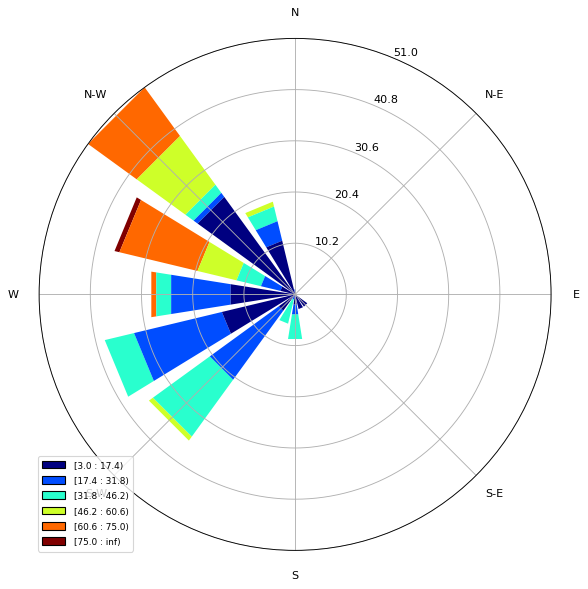

In [52]:
ax = WindroseAxes.from_ax()
ax.bar(degrees, speed)
ax.set_legend()